In [1]:
import pandas as pd
import seaborn as sns

Problem Statement:

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

We have to look into the factors that are dependent on sales and then share it with the team to take appropriate actions.

### EDA

In [2]:
yulu = pd.read_csv("yulu.csv")
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
yulu.shape

(10886, 12)

In [4]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# datetime: datetime 
# object: season, holiday, workingday, weather, 
# int: "temp", "atemp", "humidity", "windspeed", "casual", "casual", "registered", "count"

yulu[["season", "holiday", "workingday", "weather"]] = yulu[["season", "holiday", "workingday", "weather"]].astype(str)

# List of column names you want to convert to integer type
columns_to_convert = ["temp", "atemp", "humidity", "windspeed", "casual", "casual", "registered", "count"]

# Loop through each column and convert its values to integer type
for column in columns_to_convert:
    yulu[column] = yulu[column].astype(int)

yulu["datetime"] = pd.to_datetime(yulu['datetime'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [6]:
yulu.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886,10886,10886,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4,2,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734,10575,7412,7192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,19.740492,23.185468,61.886460,12.425684,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.000000,16.000000,47.000000,7.000000,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.000000,24.000000,62.000000,12.000000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.000000,31.000000,77.000000,16.000000,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.000000,45.000000,100.000000,56.000000,367.000000,886.000000,977.000000


In [7]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  int64         
 6   atemp       10886 non-null  int64         
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  int64         
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 1020.7+ KB


In [8]:
yulu.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9,14,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9,13,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9,13,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9,14,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9,14,75,0,0,1,1


In [9]:
yulu.workingday.value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [10]:
yulu.weather.value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [11]:
yulu.season.value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

/tmp/ipykernel_17497/105219704.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yulu["temp"])


<Axes: xlabel='temp', ylabel='Density'>

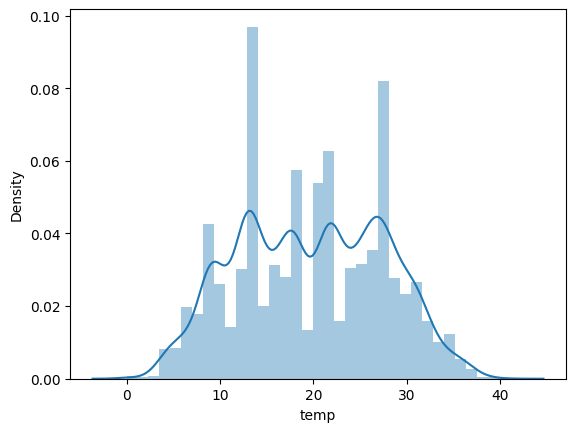

In [12]:
# Plot the distribution
sns.distplot(yulu["temp"])

/tmp/ipykernel_17497/3034417654.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yulu["count"])


<Axes: xlabel='count', ylabel='Density'>

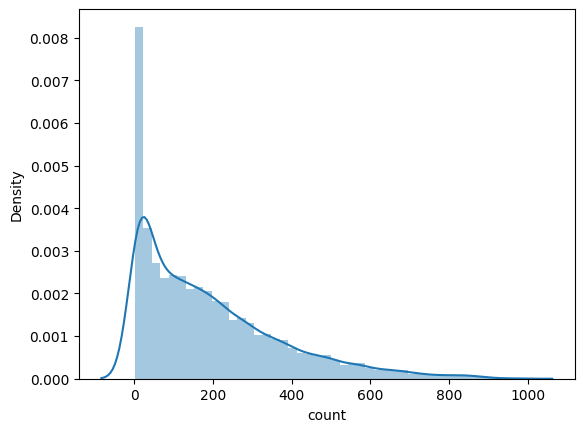

In [13]:
# Plot the distribution
sns.distplot(yulu["count"])

<Axes: xlabel='season', ylabel='count'>

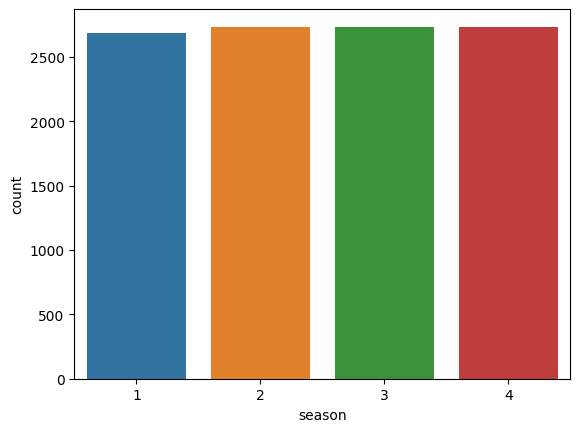

In [14]:
sns.countplot(x="season", data=yulu)

<Axes: xlabel='workingday', ylabel='count'>

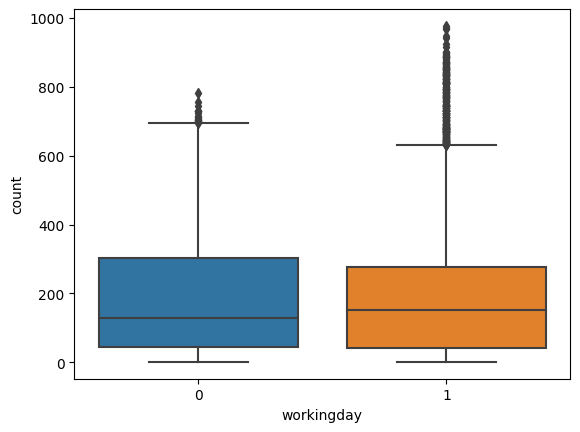

In [15]:
sns.boxplot(x="workingday", y="count", data=yulu)

<Axes: xlabel='season', ylabel='count'>

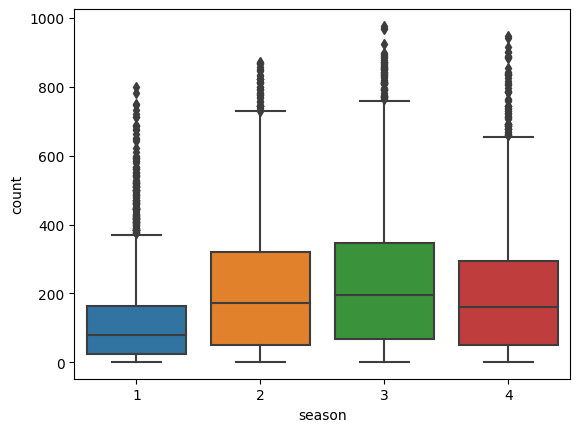

In [16]:
sns.boxplot(x="season", y="count", data=yulu)

<Axes: xlabel='weather', ylabel='count'>

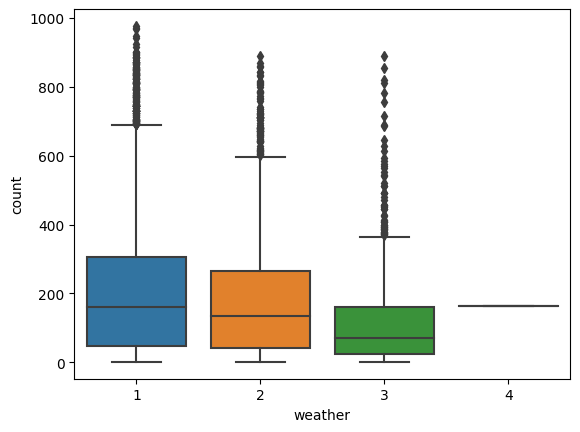

In [17]:
sns.boxplot(x="weather", y="count", data=yulu)

In [18]:
## Since we can see that count is not normalized, let's try to handle by removing outliers
#optional
q1=yulu['count'].quantile(0.25)
q3=yulu['count'].quantile(0.75)
iqr=q3-q1
iqr

242.0

In [19]:
yulu = yulu[(yulu["count"]>(q1-1.5*iqr)) & (yulu["count"]<(q3+1.5*iqr))]
yulu.shape

(10583, 12)

/tmp/ipykernel_17497/3034417654.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yulu["count"])


<Axes: xlabel='count', ylabel='Density'>

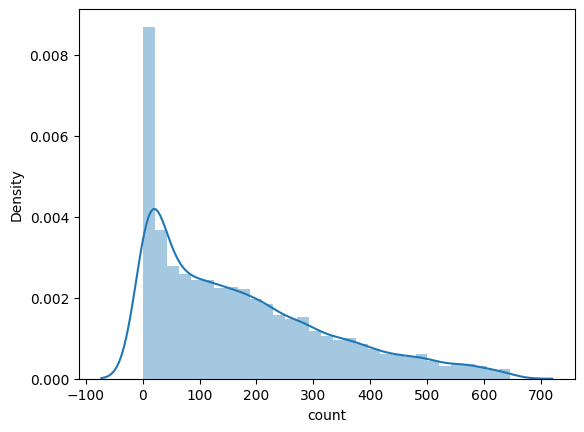

In [20]:
# Plot the distribution
sns.distplot(yulu["count"])

<Axes: xlabel='workingday', ylabel='count'>

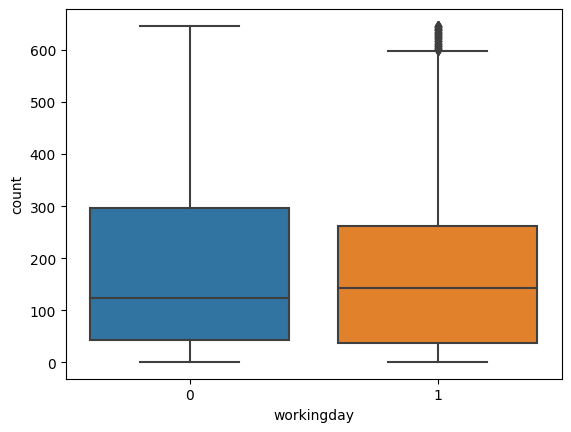

In [21]:
sns.boxplot(x="workingday", y="count", data=yulu)

In [22]:
yulu

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9,14,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9,13,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9,13,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9,14,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9,14,75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15,19,50,26,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14,17,57,15,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13,15,61,15,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13,17,61,6,12,117,129


EDA Analysis:

1. The data shape after removing the outliers based on rides taken is 10583 values, 12 features with labels.
2. Data doesn't look liek Normal Distribution after doing visualization.
3. There is no significant difference in the quartile ranges for working days with respect to bike hired.
4. In Season Vs Rides taken, season 1 i.e. spring season shows least values, while Season 3 i.e. Fall show maximum rides taken.
5. In weather Vs Rides taken, weather 3 i.e. Light Snow shows least rider takes while weather 1 i.e. Clear shows maximum rides taken.

In [23]:
## We'll be considering 5% significance value throughout the usecase
alpha = 0.05

### Working Day has effect on number of electric cycles rented

In [24]:
"""
H0 : The count of weekday is LESS THAN or equal to the count on weekend
H1 : The count on weekday is GREATER THAN count on weekend 

We'll be using T-Test sinse our sample size is large enough
"""

weekday = yulu.loc[yulu["workingday"]=="1"]["count"].sample(3300)
weekend = yulu.loc[yulu["workingday"]=="0"]["count"].sample(3300)


In [25]:
## Standard deviation for both the samples
weekday.std(), weekend.std()

(152.3914891210599, 163.75505394941317)

In [26]:
## Compute the p-value
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(weekday, weekend, equal_var=False, alternative="greater")
test_stat, p_value

(-1.7028493882895281, 0.9556782003426753)

In [27]:
if p_value < alpha:
    print("We reject the null Hypothesis")
else:
    print("Fail to reject the null Hypothesis")

Fail to reject the null Hypothesis


Based on the evaluation, we conclude that :
1. We fail to reject our NULL Hypothesis i.e. Rides count on weekday is LESS THAN or equal to the count on weekend

### No. of cycles rented similar or different in different seasons

In [28]:
yulu["season"].value_counts()

season
1    2670
4    2664
2    2633
3    2616
Name: count, dtype: int64

In [29]:
yulu.groupby(["season"])["count"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2670.0,112.795131,116.884929,1.0,24.00,78.0,161.00,644.0
2,2633.0,195.653627,166.170802,1.0,45.00,165.0,299.00,646.0
3,2616.0,210.484327,164.055532,1.0,59.75,185.0,323.25,646.0
4,2664.0,184.404655,154.563069,1.0,48.75,154.0,276.25,646.0


In [30]:
"""
H0 : The mean COUNT is same in all SEASON
H1 : The mean COUNT is different in all SEASON

We'll be using ANNOVA after testing the case conditions using Shapiro and Levene Test
"""

s1 = yulu.loc[yulu["season"]=="1"]["count"].sample(2500)
s2 = yulu.loc[yulu["season"]=="2"]["count"].sample(2500)
s3 = yulu.loc[yulu["season"]=="3"]["count"].sample(2500)
s4 = yulu.loc[yulu["season"]=="4"]["count"].sample(2500)

In [31]:
## Shapiro Test
from scipy.stats import shapiro

e, p_value = shapiro(yulu["count"].sample(7000))

if p_value < alpha:
    print("REJECT our NULL Hypothesis that our data follows Gaussian Distribution")
else:
    print("FAIL REJECT our NULL Hypothesis that our data follows Gaussian Distribution")

REJECT our NULL Hypothesis that our data follows Gaussian Distribution


/home/varun/Documents/workspace/neoversity/6 Data Analytics and Visualisation - Fundamentals/.venv/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


/tmp/ipykernel_17497/258741346.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yulu["count"].sample(7000))


<Axes: xlabel='count', ylabel='Density'>

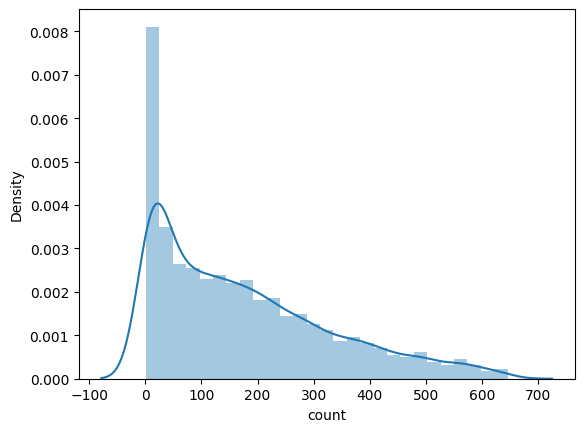

In [32]:
sns.distplot(yulu["count"].sample(7000))

/tmp/ipykernel_17497/3643855242.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(yulu["count"].sample(7000)))


<Axes: xlabel='count', ylabel='Density'>

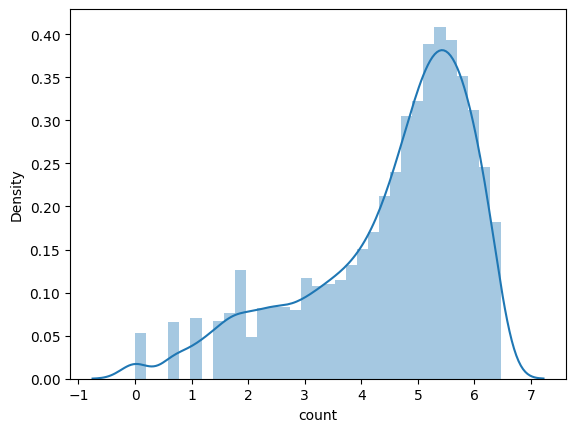

In [33]:
import numpy as np
sns.distplot(np.log(yulu["count"].sample(7000)))

In [34]:
## Levene's Test
from scipy.stats import levene

statistics, p_value = levene(s1,s2,s3,s4)

if p_value < alpha:
    print("Reject the NULL Hypothesis that sets have Equal Variances")
else:
    print("FAIL to Reject the NULL Hypothesis that Equal Variances")

Reject the NULL Hypothesis that sets have Equal Variances


In [35]:
## By looking at the analysis it states that out criterio doesn't matches, but still we will be following ANOVA since it is more generalized and detailed and results right output.
from scipy.stats import f_oneway
test_stats, p_value = f_oneway(s1,s2,s3,s4)
print(test_stats, p_value,"\n")

if p_value < alpha:
    print("Reject the NULL hypothesis that mean COUNT is same in all SEASON")
else:
    print("FAIL TO Reject the NULL hypothesis that mean COUNT is same in all SEASON")

202.3759638409876 1.967778746443962e-127 

Reject the NULL hypothesis that mean COUNT is same in all SEASON


Based on the evaluation, we conclude that :
1. We reject our NULL Hypothesis i.e. that mean COUNT of rides is same in all SEASON.

### No. of cycles rented similar or different in different weather

In [36]:
yulu["weather"].value_counts()

weather
1    6962
2    2770
3     850
4       1
Name: count, dtype: int64

In [37]:
## Remove the weather type 4 from the categorization since it has only 1 value in count.
yulu = yulu.loc[~(yulu["weather"]=="4")]
yulu["weather"].value_counts()

weather
1    6962
2    2770
3     850
Name: count, dtype: int64

In [38]:
"""
H0 : The mean COUNT is same in all WEATHER, weather has no impact on Rides
H1 : The mean COUNT is different in all WEATHER, weather has impact on Rides

We'll be using ANNOVA after testing the case conditions using Shapiro and Levene Test
"""

w1 = yulu.loc[yulu["weather"]=="1"]["count"].sample(800)
w2 = yulu.loc[yulu["weather"]=="2"]["count"].sample(800)
w3 = yulu.loc[yulu["weather"]=="3"]["count"].sample(800)

In [39]:
yulu.groupby(["weather"])["count"].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


In [40]:
## Normality we already checked in out previous test case, now let's check Levene's test
## Levene's Test
from scipy.stats import levene

statistics, p_value = levene(w1,w2,w3)

if p_value < alpha:
    print("Reject the NULL Hypothesis that sets have Equal Variances")
else:
    print("FAIL to Reject the NULL Hypothesis that Equal Variances")

Reject the NULL Hypothesis that sets have Equal Variances


In [41]:
## By looking at the analysis it states that out criterio doesn't matches.
## But still we will be following ANOVA since it is more generalized and detailed and results right output.
from scipy.stats import f_oneway
test_stats, p_value = f_oneway(w1,w2,w3)
print(test_stats, p_value,"\n")
if p_value < alpha:
    print("REJECT the NULL Hypothesis, that < mean COUNT is same in all WEATHER and that weather has no impact on Rides >")
else:
    print("FAIL to reject the NULL Hypothesis")

57.11857817188354 5.843810077596215e-25 

REJECT the NULL Hypothesis, that < mean COUNT is same in all WEATHER and that weather has no impact on Rides >


Based on the evaluation, we conclude that :
1. We reject our NULL Hypothesis i.e. mean COUNT OF rides is same in all WEATHER and that weather has no impact on Rides

### Weather is dependent on season (check between 2 predictor variable)

In [42]:
yulu["weather"].value_counts()

weather
1    6962
2    2770
3     850
Name: count, dtype: int64

In [43]:
yulu["season"].value_counts()

season
1    2669
4    2664
2    2633
3    2616
Name: count, dtype: int64

In [44]:
"""
# H0: Weather and Season are independent
# Ha: Weather and Season are dependent

We'll be using CHISQUARE, since both are categorical types
"""

weather_season = pd.crosstab(index=yulu['weather'],columns=yulu['season'])
weather_season

season,1,2,3,4
weather,,,,
1,1744,1720,1842,1656
2,714,690,579,787
3,211,223,195,221


In [45]:
from scipy.stats import chi2_contingency 

chi_stat, p_value, df, exp_value = chi2_contingency(weather_season)
print(chi_stat, p_value, df, exp_value,"\n")

if p_value < 0.05:
    print("Reject NULL HYPOTHESIS i.e. Weather and Season are independent")
else:
    print("Wheather and Season are DEPENDENT")


44.19795559650439 6.75312212866461e-08 6 [[1755.96087696 1732.27612928 1721.09166509 1752.67132867]
 [ 698.65148365  689.22793423  684.77792478  697.34265734]
 [ 214.38763939  211.4959365   210.13041013  213.98601399]] 

Reject NULL HYPOTHESIS i.e. Weather and Season are independent


Based on the evaluation, we conclude that :
1. We reject our NULL Hypothesis i.e. WHETHER AND SEASON are INDEPENDENT.

### Recommendations :

1. We have sufficient evidence to say that Weekdays rides are less than Weekend rides. Hence we should plan the bussiness and create the pipeline accordingly.
2. For SEASON and WEATHER we reject that their is no impact on rides taken, they have their impact and we should do proper analysis to check all scenaios where our revenue is not improving.
3. We saw that whether and season not INDEPENDENT hence we should focus on such structural planning that can have an impacts on both.
 